### LR實現綫性預測

In [16]:
# load the data
import pandas as pd
data = pd.read_csv('generated_data.csv')
data

,x,y
0,1,7
1,2,9
2,3,11
3,4,13
4,5,15
5,6,17
6,7,19
7,8,21
8,9,23
9,10,25


In [6]:
data.head()
print(type(data),data.shape)

<class 'pandas.core.frame.DataFrame'> (10, 2)


In [7]:
# data賦值
x = data.loc[:,'x']
y = data.loc[:,'y']
print(x,y)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: x, dtype: int64 0     7
1     9
2    11
3    13
4    15
5    17
6    19
7    21
8    23
9    25
Name: y, dtype: int64


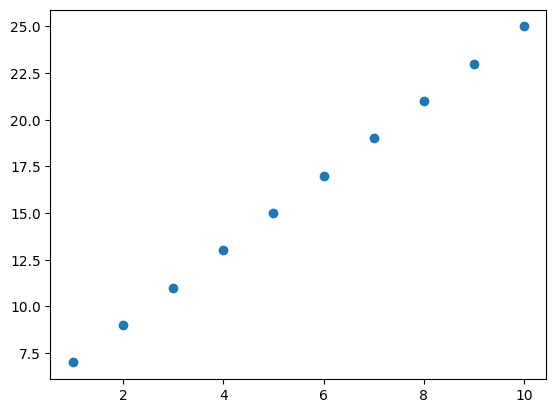

In [8]:
# visualize the data
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [9]:
#set up a linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [10]:
import numpy as np
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)
print(x.shape)

(10, 1)


In [11]:
lr_model.fit(x,y)

LinearRegression()

In [12]:
a=lr_model.coef_
b=lr_model.intercept_
print(a,b)

[[2.]] [5.]


In [13]:
y_predict = lr_model.predict(x)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y,y_predict)
R2 = r2_score(y,y_predict)
print(MSE,R2)

3.1554436208840474e-31 1.0


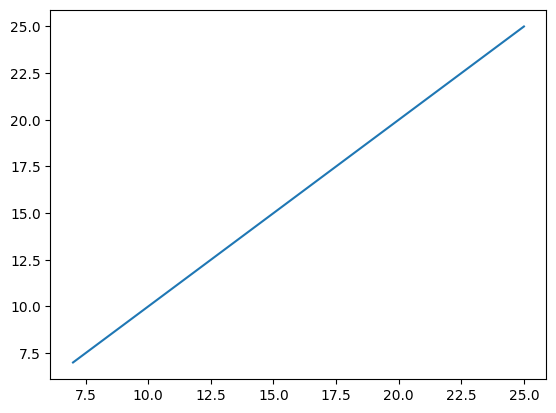

In [15]:
plt.figure()
plt.plot(y,y_predict)
plt.show()

In [19]:
#load the data
data = pd.read_csv('usa_housing_price.csv')
data.head() #预览数据。数据很多，预览数据只是预览前五项。

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


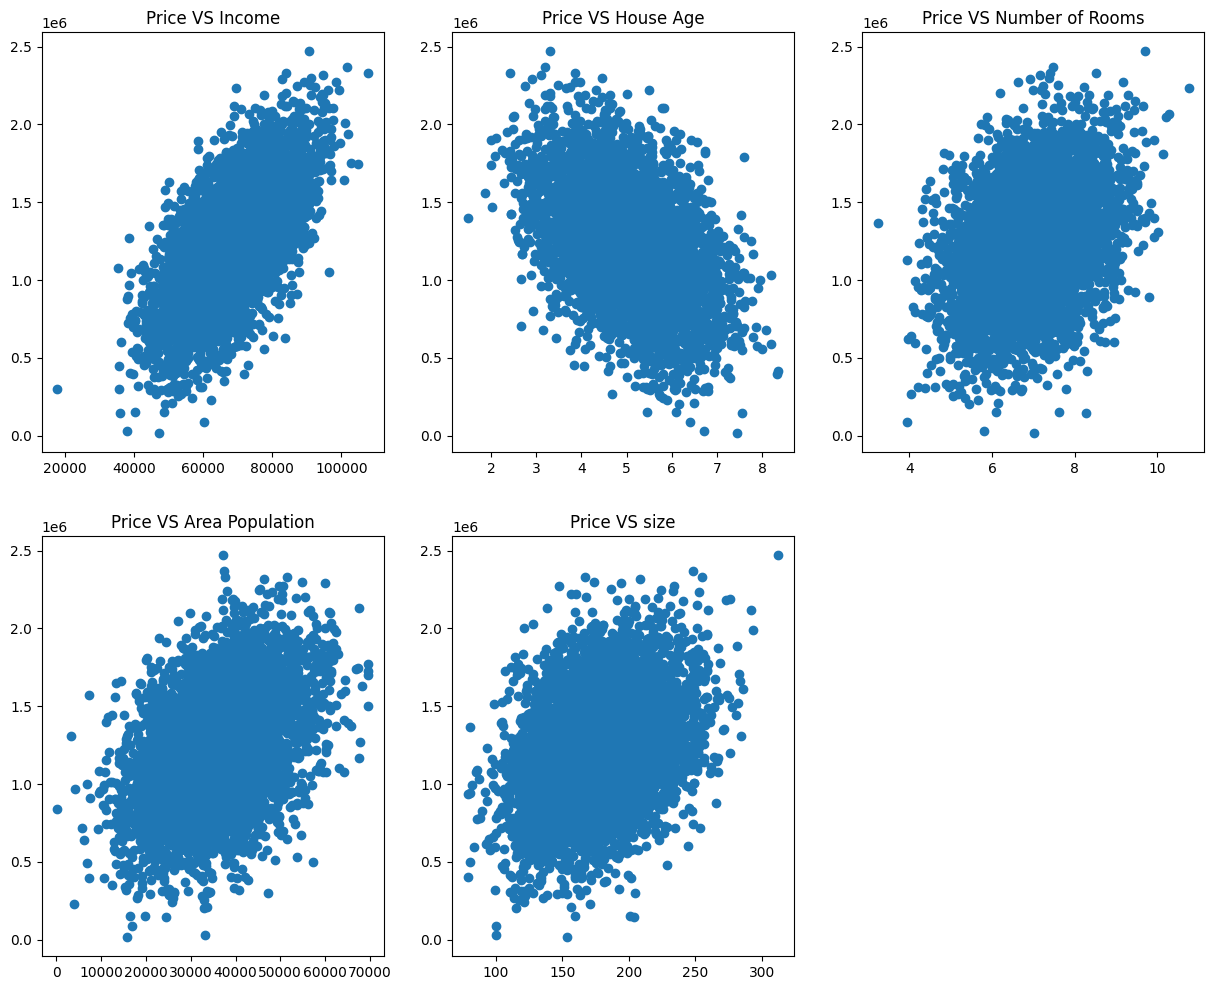

In [22]:
# %matplotlib inline #老版本的才要這個新版本寫這個會報錯，後面的也不寫這個了
fig = plt.figure(figsize=(15,12)) #定義畫布大小，覺得效果還行也可以不定義畫布
fig1 =plt.subplot(231) #231是指两行三列的第一个图，下面的232是指两行三列的第二个图，依次类推
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price']) #获取数据，画出一个散点图
plt.title('Price VS Income') #散点图的名称

fig2 =plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 =plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 =plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 =plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show() #展示散点图

In [24]:
#定义输入变量X_multi
X_multi = data.drop(['Price'],axis=1) #去掉price所在列
y = data.loc[:,'Price']
X_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


73645940735.13448 0.40925930704314073


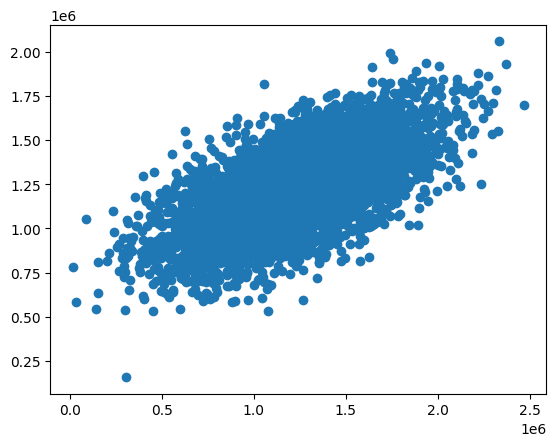

In [52]:
x_Income = data.loc[:,'Avg. Area Income']
x_Income=np.array(x_Income)
x_Income=x_Income.reshape(-1,1)
LR_Income = LinearRegression()#建立模型
LR_Income.fit(x_Income,y) #训练模型
y_predict_Income = LR_Income.predict(x_Income)
mean_squared_error_Income = mean_squared_error(y,y_predict_Income)
r2_score_Income = r2_score(y,y_predict_Income)
print(mean_squared_error_Income,r2_score_Income)
#图形评估
fig6 = plt.figure()
plt.scatter(y,y_predict_Income)

In [29]:
LR_multi = LinearRegression()#建立模型
LR_multi.fit(X_multi,y) #训练模型

LinearRegression()

In [30]:
#模型预测
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

[1223968.89166086 1497306.3318863  1250884.31019437 ... 1020693.92390376
 1260503.36914585 1302737.7915763 ]


In [31]:
#模型评估
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219846512.177862 0.9180229195220739


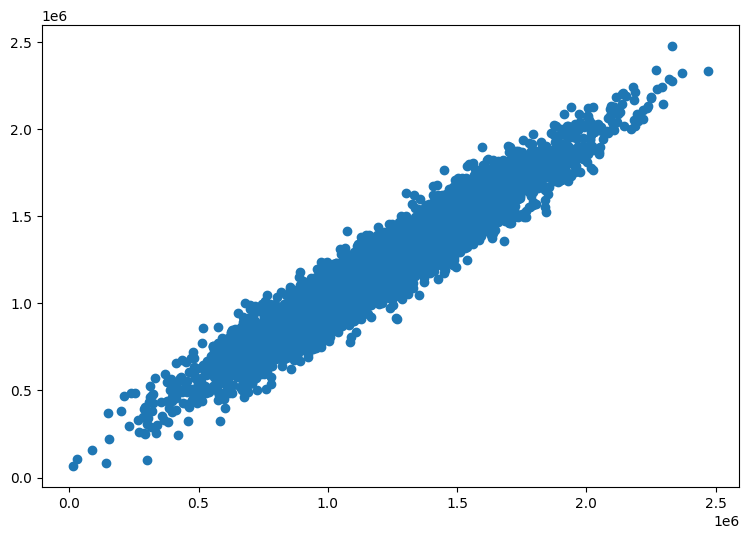

In [48]:
#图形评估
fig6 = plt.figure(figsize=(9,6))
plt.scatter(y,y_predict_multi)